In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 
import string 
import re

In [3]:
!pip install yellowbrick

In [4]:
!pip install tensorflow

In [5]:
import warnings
warnings.filterwarnings("ignore")

# libs pre-prossesing of data
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
# download stopwords
nltk.download('stopwords')

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.text import FreqDistVisualizer

from tensorflow import keras
from tensorflow.keras import layers

Encoder = LabelEncoder()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
!pip install wordcloud

In [7]:
post_users_original = pd.read_csv('Daily_mood_tracker.csv')

In [8]:
post_users_original.head(10)

,User,Post,Label
0,user-0,"['Its not a viable option, and youll be leavin...",Supportive
1,user-1,['It can be hard to appreciate the notion that...,Ideation
2,user-2,"['Hi, so last night i was sitting on the ledge...",Behavior
3,user-3,['I tried to kill my self once and failed badl...,Attempt
4,user-4,['Hi NEM3030. What sorts of things do you enjo...,Ideation
5,user-5,"['Since I dont know what DBT is, would you min...",Supportive
6,user-6,"['No matter what you ever think, there will be...",Supportive
7,user-7,"['Dont see it as failing at killing yourself, ...",Ideation
8,user-8,['The reason I have faith in our species abili...,Supportive
9,user-9,['A book is usually what I do when Im getting ...,Ideation


In [9]:
post_users_original.tail(10)

,User,Post,Label
518,user-491,"['Hey man, dont be so hard on yourself, it is ...",Supportive
519,user-492,['I dont really know to be honest..only made a...,Supportive
520,user-493,"['in all honesty, though it was literally pris...",Indicator
521,user-494,['Be her better half. You have to put yourself...,Supportive
522,user-495,"['Its not the end, it just feels that way. Or ...",Supportive
523,user-496,"['It was a skype call, but she ended it and Ve...",Indicator
524,user-497,['That sounds really weird.Maybe you were Dist...,NaN
525,NaN,Supportive,NaN
526,user-498,['Dont know there as dumb as it sounds I feel ...,Attempt
527,user-499,"['&gt;It gets better, trust me.Ive spent long ...",Behavior


In [10]:
post_users_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    500 non-null    object
 1   Post    528 non-null    object
 2   Label   472 non-null    object
dtypes: object(3)
memory usage: 12.5+ KB


In [11]:
# copy dataframe for analyze
post_users_analyze = post_users_original.copy()

In [12]:
# get list of labels
list_labels = post_users_analyze['Label'].unique()

In [13]:
# visualization random post 
post_users_original['Post'][0]

"['Its not a viable option, and youll be leaving your wife behind. Youd Pain her beyond comprehension.It sucks worrying about money, I know that first hand. It can definitely feel hopeless, as you seem to be Tired aware of. Your wife might need to chip in financially. I know time is an issue, but even 10-15 hours a Asthenia could alleviate a lot of the pressure. In the meantime, get your shit together - write that resume tomorrow. No excuses, get it done and send it out. Whether you believe in some sort of powerful being or force governing things or not, things really do work themselves out. This is a big test for you, and youll pull through. Just try to stay as positive as you can and everything will work out.']"

In [14]:
# show counts label in dataframe

display(post_users_original['Label'].value_counts())

Ideation      165
Supportive     99
Indicator      93
Behavior       73
Attempt        42
Name: Label, dtype: int64

In [15]:
# more information about data 
post_users_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    500 non-null    object
 1   Post    528 non-null    object
 2   Label   472 non-null    object
dtypes: object(3)
memory usage: 12.5+ KB


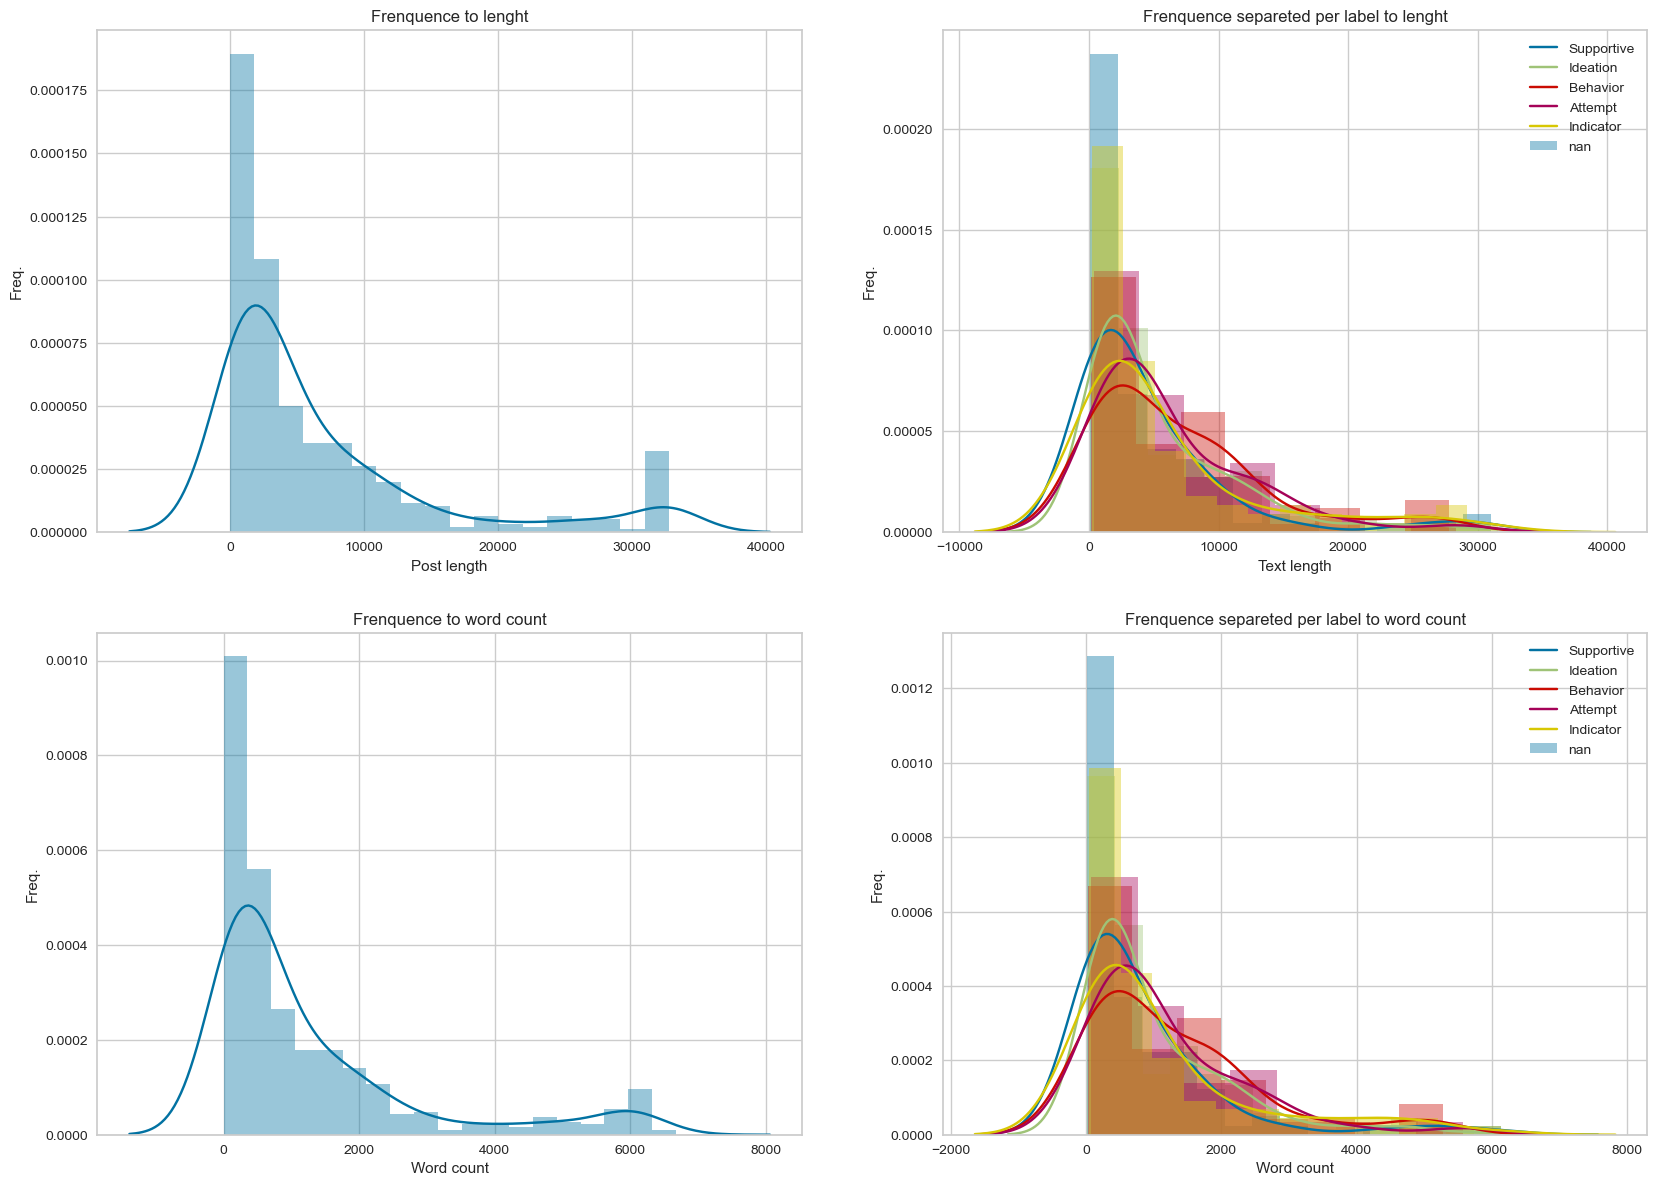

In [16]:
# show frenquence to lenght for each post
post_users_analyze['Post_len'] = post_users_analyze['Post'].str.len()
plt.figure(figsize=(20,30))
plt.subplot(4, 2, 1)
ax = sns.distplot(post_users_analyze['Post_len'])
ax.set(xlabel='Post length', ylabel='Freq.')
plt.title('Frenquence to lenght')

# show frenquence separeted per label to lenght for each post
plt.subplot(4, 2, 2)
i = 0
while i < len(list_labels):
    ax = sns.distplot(post_users_analyze[post_users_analyze['Label'] == list_labels[i]]['Post_len'])
    i = i + 1
ax.set(xlabel='Text length', ylabel='Freq.')
ax.legend(labels=list_labels)
plt.title('Frenquence separeted per label to lenght')

# show frenquence to word count for each post
post_users_analyze['word_count'] = post_users_analyze['Post'].str.split().map(lambda x:len(x))
plt.subplot(4, 2, 3)
ax = sns.distplot(post_users_analyze['word_count'])
ax.set(xlabel='Word count', ylabel='Freq.')
plt.title('Frenquence to word count')

# show frenquence separeted per label to word count for each post
plt.subplot(4, 2, 4)
i = 0
while i < len(list_labels):
    ax = sns.distplot(post_users_analyze[post_users_analyze['Label'] == list_labels[i]]['word_count'])
    i = i + 1
ax.set(xlabel='Word count', ylabel='Freq.')
ax.legend(labels=list_labels)
plt.title('Frenquence separeted per label to word count')
plt.show()

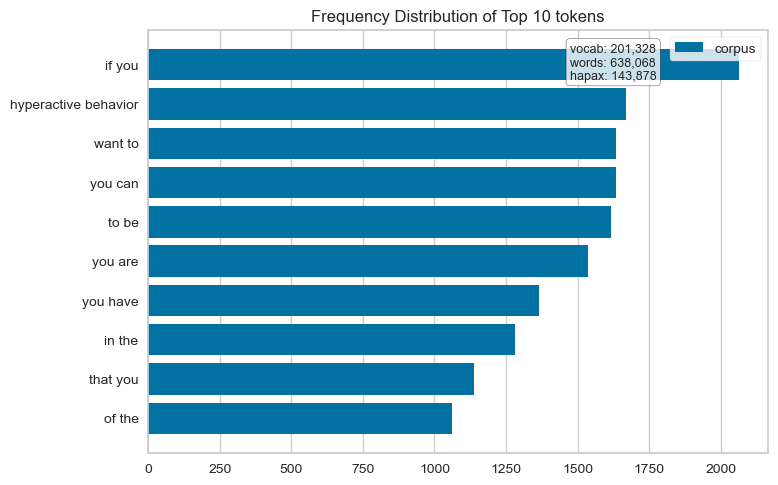

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [17]:
# show a 10 most bigrams frenquece (no cleaned of data, we can make pre-processing of data)
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs = vectorizer.fit_transform(post_users_analyze['Post'].tolist())
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h', n=10)
visualizer.fit(docs)
visualizer.show()

In [21]:
import nltk
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
WordNetLemmatizer().lemmatize("better kip")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\Lenovo/nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [19]:
# drop column user (not used)
post_users_analyze = post_users_analyze.drop(columns=['User'])

# drop null values in post
post_users_analyze['Post'].dropna(inplace=True)

# set lower case for post
post_users_analyze['Post'] = [entry.lower() for entry in post_users_analyze['Post']]

# transform text into token
post_users_analyze['Post'] = [word_tokenize(entry) for entry in post_users_analyze['Post']]

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(post_users_analyze['Post']):
    final_words = []
    word_lemmatized = WordNetLemmatizer()
    
    # pos_tag functon below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else
    for word, tag in pos_tag(entry):
        
        # below condition is to check for stop words and consider only aphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_final = word_lemmatized.lemmatize(word, tag_map[tag[0]])
            final_words.append(word_final)
            
    post_users_analyze.loc[index,'post_new'] = str(final_words)

    
# set news values for column Post and drop column aux    
post_users_analyze['Post'] = post_users_analyze['post_new'].str.replace("'", "")
post_users_analyze['Post'] = post_users_analyze['Post'].str.replace(",", "")
post_users_analyze['Post'] = post_users_analyze['Post'].str.replace("[", "")
post_users_analyze['Post'] = post_users_analyze['Post'].str.replace("]", "")
post_users_analyze = post_users_analyze.drop(columns=['post_new'])

# show values pre-processed
post_users_analyze.head()

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\Lenovo/nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# new show frenquence to lenght for each post
post_users_analyze['Post_len'] = post_users_analyze['Post'].str.len()
plt.figure(figsize=(20,30))
plt.subplot(4, 2, 1)
ax = sns.distplot(post_users_analyze['Post_len'])
ax.set(xlabel='Post length', ylabel='Freq.')
plt.title('Frenquence to lenght')

# new show frenquence separeted per label to lenght for each post
plt.subplot(4, 2, 2)
i = 0
while i < len(list_labels):
    ax = sns.distplot(post_users_analyze[post_users_analyze['Label'] == list_labels[i]]['Post_len'])
    i = i + 1
ax.set(xlabel='Text length', ylabel='Freq.')
ax.legend(labels=list_labels)
plt.title('Frenquence separeted per label to lenght')

# new show frenquence to word count for each post
post_users_analyze['word_count'] = post_users_analyze['Post'].str.split().map(lambda x:len(x))
plt.subplot(4, 2, 3)
ax = sns.distplot(post_users_analyze['word_count'])
ax.set(xlabel='Word count', ylabel='Freq.')
plt.title('Frenquence to word count')

# new show frenquence separeted per label to word count for each post
plt.subplot(4, 2, 4)
i = 0
while i < len(list_labels):
    ax = sns.distplot(post_users_analyze[post_users_analyze['Label'] == list_labels[i]]['word_count'])
    i = i + 1
ax.set(xlabel='Word count', ylabel='Freq.')
ax.legend(labels=list_labels)
plt.title('Frenquence separeted per label to word count')
plt.show()

In [ ]:
# show again a 10 most bigrams frenquece (cleaned data)
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs = vectorizer.fit_transform(post_users_analyze['Post'].tolist())
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='h', n=10)
visualizer.fit(docs)
visualizer.show()

In [ ]:
# words cloud of post 
fig, axes = plt.subplots(5, 1, figsize=[50, 30])

i = 0
while i < len(list_labels):
    df_aux = post_users_analyze[post_users_analyze['Label'] == list_labels[i]]['Post']

    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=2500,
                          height=2000
                          ).generate(" ".join(df_aux))

    axes[i].imshow(wordcloud)
    axes[i].axis('off')
    axes[i].set_title(f'Most Words {str(list_labels[i])}')
    i = i + 1

plt.show()   

In [ ]:
vocabulary_size = 3000
sent_length = 100

# get post for preprocesssing before create and train model
corpus = post_users_analyze['Post'].tolist()
y = post_users_analyze['Label']

# one hot representation
onehot_rep = [one_hot(words, vocabulary_size) for words in corpus]

# embedding representation
embedded_post = pad_sequences(onehot_rep, padding = 'pre', maxlen = sent_length)

In [ ]:
X = np.array(embedded_post)

# Encode the category column
y = np.array(Encoder.fit_transform(y))

X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = y)

In [ ]:
embedding_vector_features = 40
model = keras.Sequential()
model.add(layers.Embedding(vocabulary_size, embedding_vector_features, input_length = embedded_post.shape[1]))
model.add(layers.LSTM(100))
model.add(layers.Dense(5, activation = 'sigmoid'))
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn, optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
train_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 5, batch_size = 64)

In [ ]:
# Plot model performance
acc = train_model.history['accuracy']
val_acc = train_model.history['val_accuracy']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs_range = range(1, len(train_model.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()